In [10]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

from pca import PCA
from kernel_pca import kernelPCA

plt.rcParams['figure.constrained_layout.use'] = True
np.set_printoptions(precision=2)

In [11]:
datafile = '../data/mnist/random_mnist_1000.npy'
labelfile = '../data/mnist/random_mnist_1000_labels.npy'

### Sub-question i.

In [15]:
pc = PCA(data_file=datafile,
        label_file=labelfile)
pc.run()

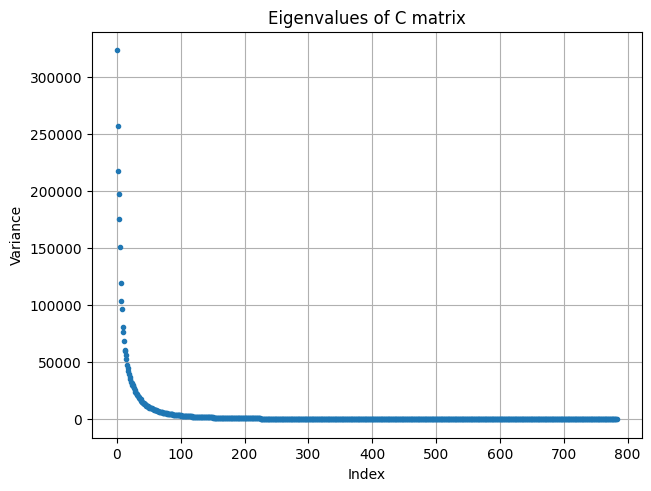

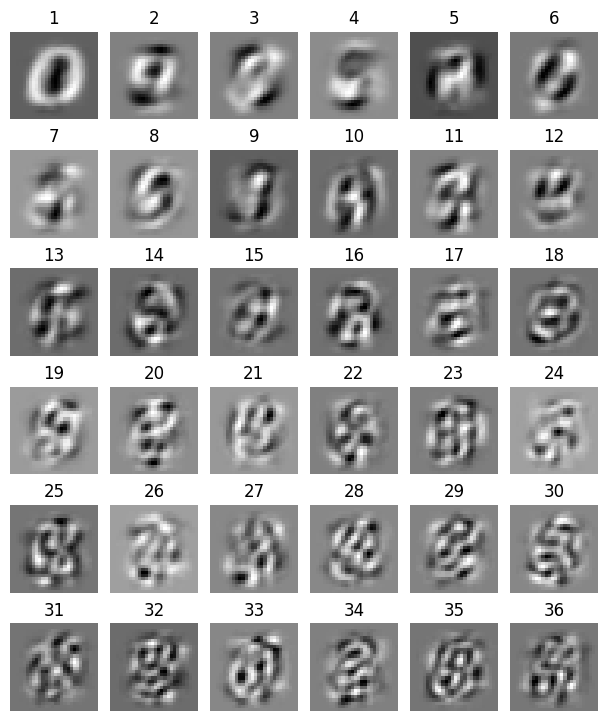

In [4]:
lam = pc.lam.copy()
lam = lam[::-1]

#print(lam[:25])
plt.grid("on")
plt.title("Eigenvalues of C matrix")
plt.xlabel("Index")
plt.ylabel("Variance")
plt.plot(lam, '.')
plt.savefig(f"../outputs/question1/q1_i_eigen_plot")

# visualize
cnt = 1
num = 6
plt.figure(figsize = (num,num+1.1))
for i in range(0,num):
    for j in range(0,num):
        plt.subplot(num, num, cnt)
        arr2 = np.reshape(pc.w[784-cnt], (28, 28))
        plt.axis("off")
        plt.title(f"{cnt}")
        plt.imshow(arr2, cmap="gray")
        cnt+=1
plt.savefig(f"../outputs/question1/q1_i_eigen_nums")
plt.show()

In [5]:
# thumbrule calculation
sm = np.sum(pc.lam)
smi = 0
lim = None
for i in range(784):
    smi+=pc.lam[783-i]
    if(smi>=0.95*sm):
        lim = 783-i
        print(i+1, smi)
        break

# construct eigval table
num_lam = 10

var_table = pd.DataFrame.from_dict({"Variance":lam[:num_lam],
                                    "Percent Variance explained":100*lam[:num_lam]/np.sum(lam)})
display(var_table)

# construct cumulative variance table
disp_lam = [1, 10, 50, 100, 132, 180, 300, 784]
cum_var = []
per_var = []
for lm in disp_lam:
    cum_var.append(np.sum(lam[:lm]))
    per_var.append(100*np.sum(lam[:lm])/np.sum(lam))


cum_var_table = pd.DataFrame.from_dict({"Index":disp_lam,
                                        "Cumulative Variance":cum_var,
                                        "Percent Cumulative Variance":per_var})
display(cum_var_table)

# save data to text files
with open(f"../outputs/question1/q1_i_variance_table.tex", 'w') as f:
    f.write(var_table.to_latex(index=False, 
                               float_format="{:.2f}".format))
with open(f"../outputs/question1/q1_i_cumulative_variance_table.tex", 'w') as f:
    f.write(cum_var_table.to_latex(index=False, 
                               float_format="{:.2f}".format))

132 3277532.9609661046


,Variance,Percent Variance explained
0,323224.156656,9.372979
1,256903.073107,7.449775
2,217670.087193,6.312081
3,197227.502539,5.719279
4,174950.146158,5.073272
5,150401.469940,4.361400
6,118927.731546,3.448712
7,103884.246803,3.012476
8,96676.893740,2.803474
9,80626.473684,2.338038


,Index,Cumulative Variance,Percent Cumulative Variance
0,1,3.232242e+05,9.372979
1,10,1.720492e+06,49.891486
2,50,2.892267e+06,83.871081
3,100,3.195399e+06,92.661408
4,132,3.277533e+06,95.043168
5,180,3.348407e+06,97.098391
6,300,3.422916e+06,99.259045
7,784,3.448468e+06,100.000000


### Sub-question ii.

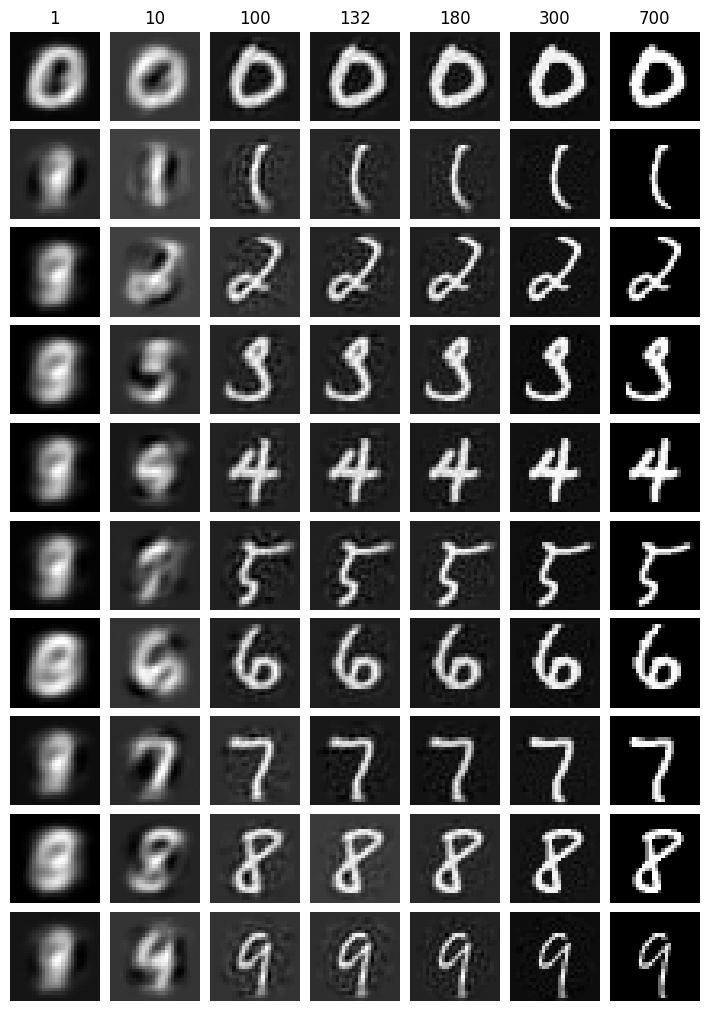

In [6]:
idx = [1, 101, 201, 301, 401, 501, 601, 701, 801, 901]
disp = [1, 10, 100, 132, 180, 300, 700, ]

plt.figure(figsize = (len(disp),len(idx)))

for j, id in enumerate(idx):
    for i, d in enumerate(disp):
        arr = pc.reconstruct(index=id, order=d)
        arr2 = np.reshape(arr, (28,28))
        plt.subplot(len(idx), len(disp), j*len(disp)+(i+1))
        if(j == 0):
            plt.title(f"{d}")
        plt.axis("off")
        plt.imshow(arr2, cmap='gray')

plt.savefig(f"../outputs/question1/q1_ii_reconst")


### Sub-question iii.

2777978993013063.0 1624512277450985.2
1000
500 0.9500690506630546


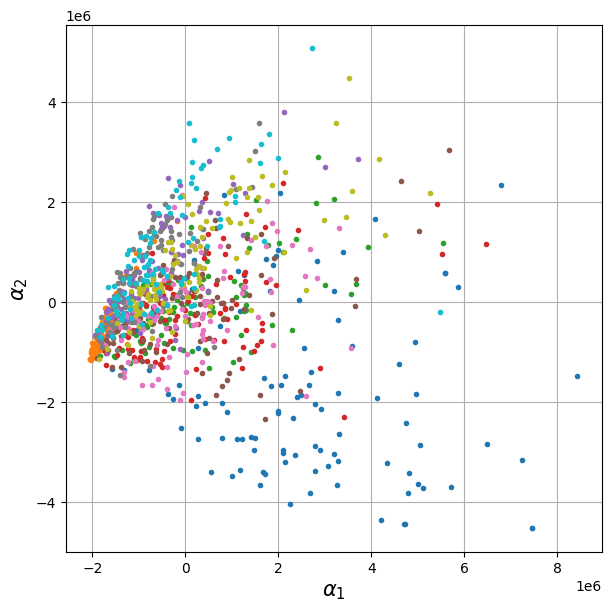

2.1540410097642525e+22 1.194848457100703e+22
1000
549 0.950176409445956


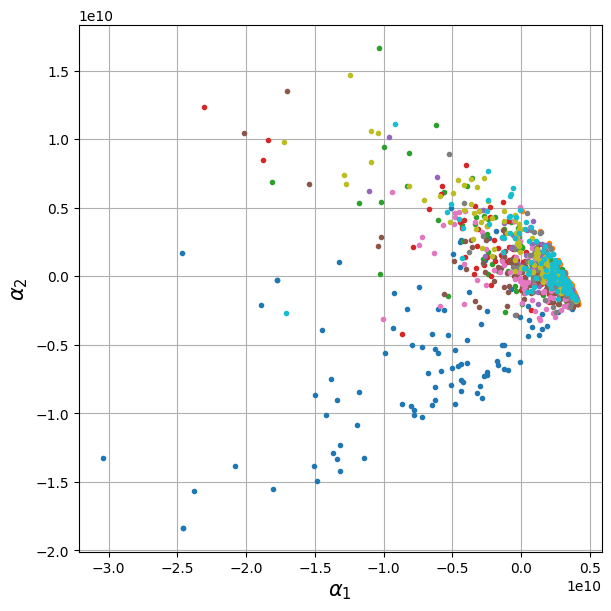

1.6921612123448714e+29 9.506785899756707e+28
1000
506 0.9500931613137867


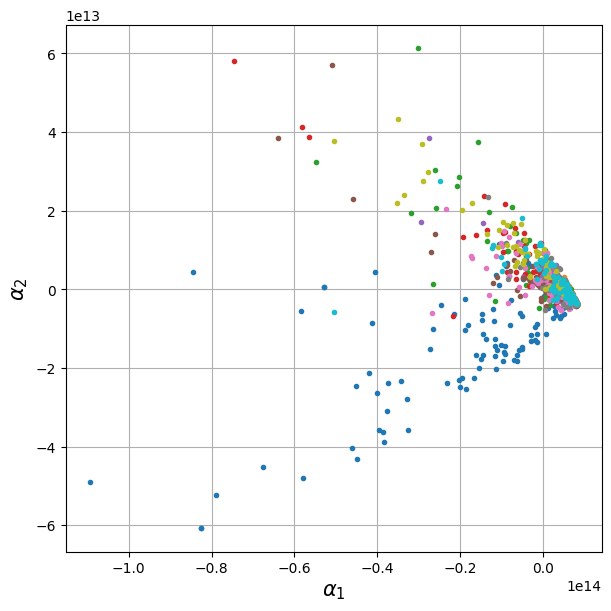

,d,\% Variance ($lpha_1$),\% Variance ($lpha_2$),Components for 95\%
0,2,8.874737,5.189787,500
1,3,8.437111,4.680073,549
2,4,7.908583,4.443147,506


In [17]:
d = [2, 3, 4]

per_a1 = []
per_a2 = []
per_95 = []

for i, s in enumerate(d):
    plt.figure(figsize = (6, 6))
    
    kpc = kernelPCA(data_file=datafile,
                    kernel="polynomial",
                    params={"d": s,
                            "sigma": 1000},
                   label_file=labelfile)
    kpc.run()
    
    sm = np.sum(np.maximum(kpc.nlam, 0.0))
    print(kpc.nlam[-1], kpc.nlam[-2])

    per_a1.append(100*kpc.nlam[-1]/sm)
    per_a2.append(100*kpc.nlam[-2]/sm)

    sm = np.sum(kpc.nlam)
    smi = 0
    lim = None
    nm = kpc.nlam.shape[0]
    print(nm)
    for i in range(nm):
        smi+=max(kpc.nlam[nm-i-1], 0)
        if(smi>=0.95*sm):
            lim = nm-i-1
            print(i+1, smi/sm)
            per_95.append(i+1)
            break


    
    a1 = kpc.alpha[-1]
    a2 = kpc.alpha[-2]

    for i in range(kpc.num_points):
        xi = np.inner(kpc.k[i], a1)
        yi = np.inner(kpc.k[i], a2)

        plt.plot(xi, yi, '.', color=kpc.colors[kpc.labels[i]])
    plt.grid("on")
    
    plt.xlabel(r"$\alpha_1$", fontsize=15)
    plt.ylabel(r"$\alpha_2$", fontsize=15)
    plt.savefig(f"../outputs/question1/q1_iii_poly_plot{s}")
    plt.show()

poly_df = pd.DataFrame.from_dict({"d": d,
                                  "\% Variance ($\alpha_1$)":per_a1,
                                  "\% Variance ($\alpha_2$)":per_a2,
                                  "Components for 95\%": per_95})

with open(f"../outputs/question1/q1_iii_poly_table.tex", 'w') as f:
    f.write(poly_df.to_latex(index=False, 
                               float_format="{:.2f}".format))

display(poly_df)

1.9999999999999993 1.9999999999999984
1000
947 0.9509506563602986


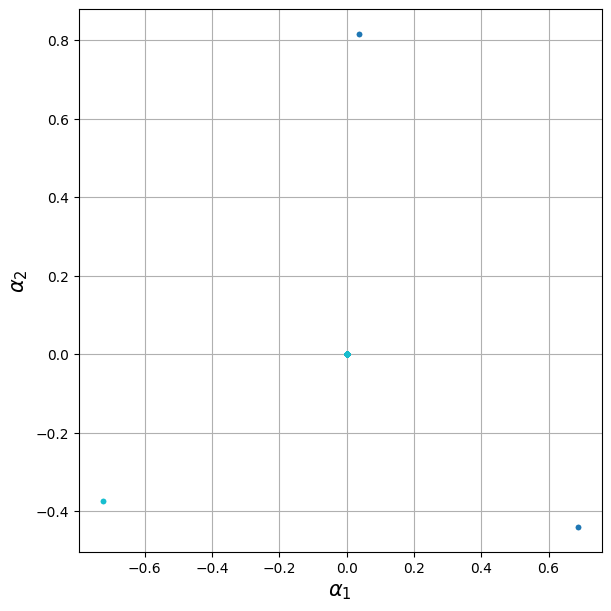

1.9999999999999993 1.9999999999999984
1000
947 0.9509506563602986


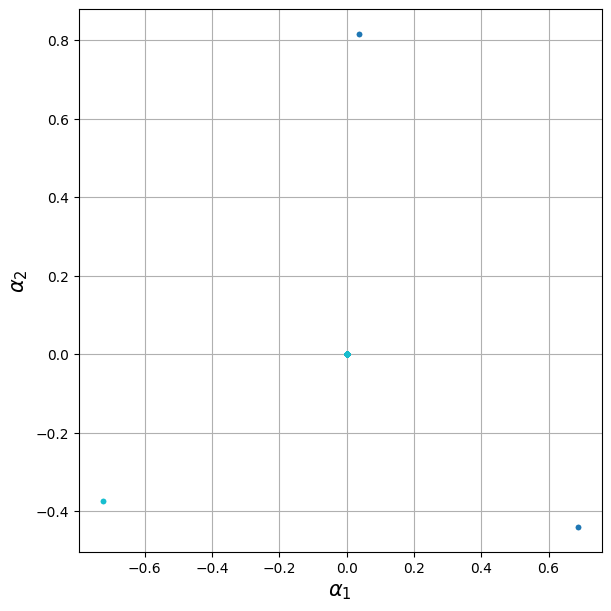

2.0000000000000013 1.9999999999999991
1000
947 0.9509519112664248


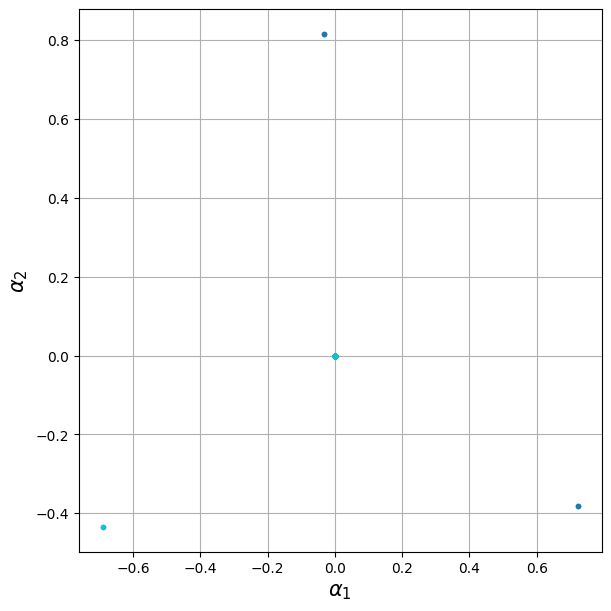

26.97140383342682 16.320130251516385
1000
834 0.9503151103353967


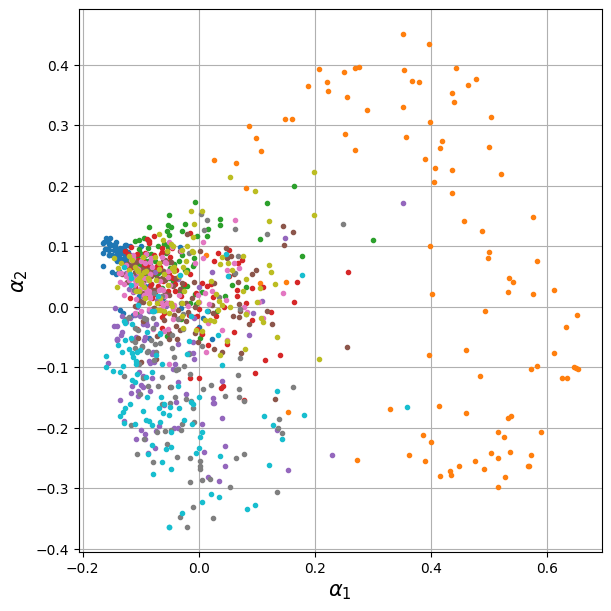

39.29272856896469 28.94207948966845
1000
716 0.9502070597552693


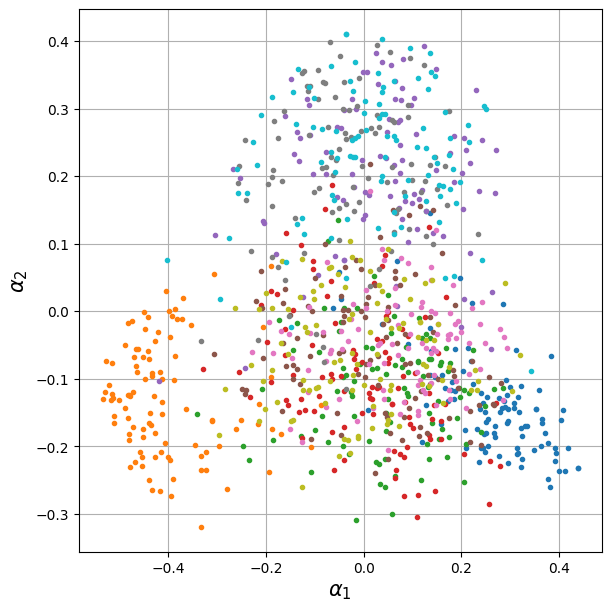

37.415287984045364 28.801678380844095
1000
594 0.9500089552819667


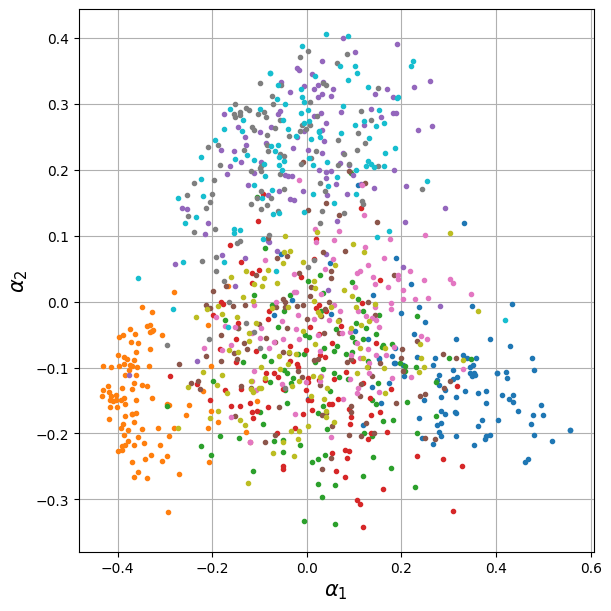

25.173380855010475 19.783293554423445
1000
406 0.9501433546381438


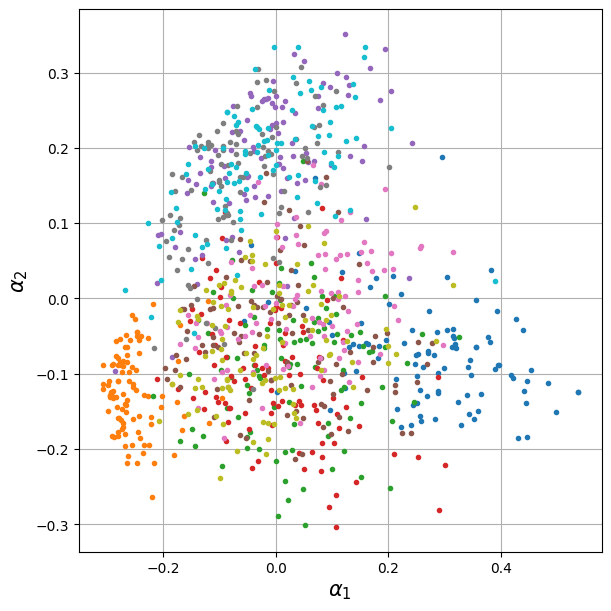

16.498737474643704 13.036791280366428
1000
295 0.9501693041170244


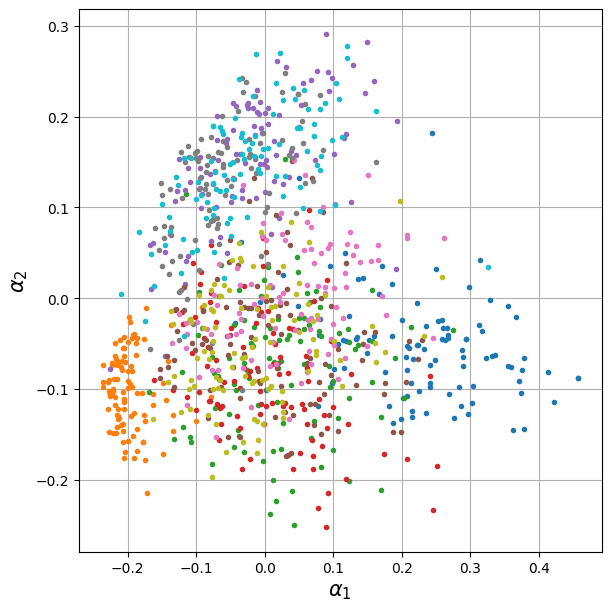

3.1278006361728736 2.4838816325234827
1000
153 0.9503236158196808


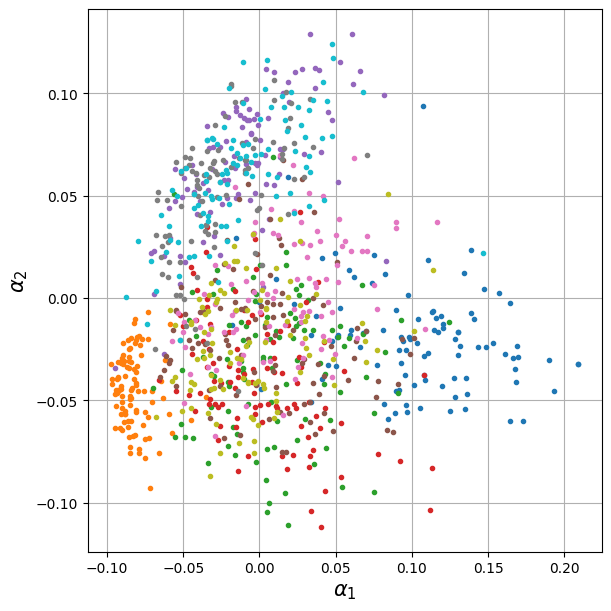

0.03231177339225751 0.025681631213614605
1000
132 0.9503216592904258


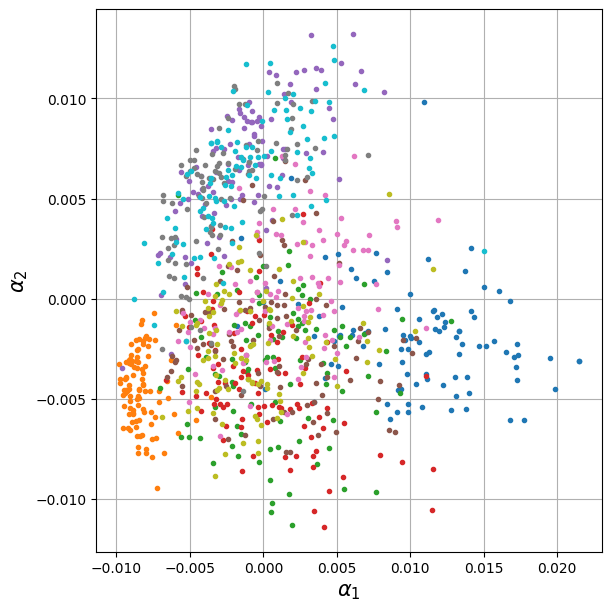

0.0003232230922274701 0.00025690220533422487
1000
132 0.9504305844818345


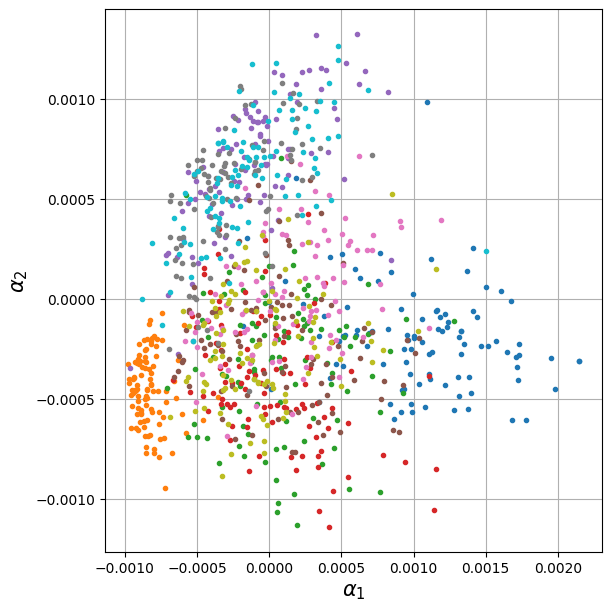

3.23224146012878e-06 2.569030644214151e-06
1000
132 0.9504316794562822


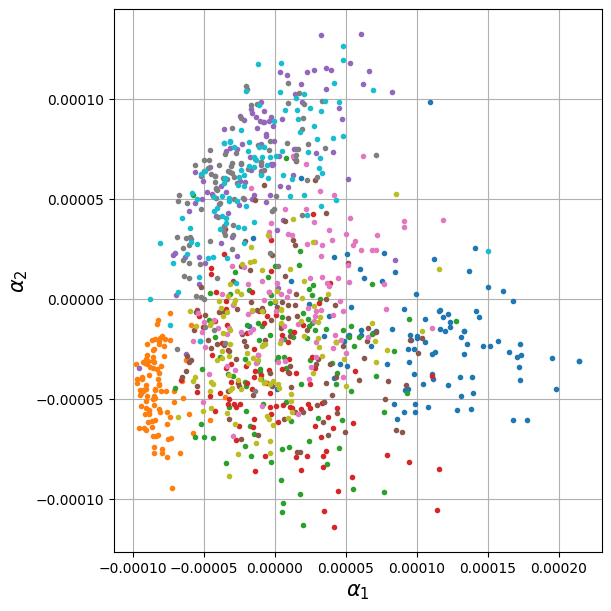

,$\sigma$,\% Variance ($lpha_1$),\% Variance ($lpha_2$),Components for 95\%
0,1.0,0.200201,0.200201,947
1,10.0,0.200201,0.200201,947
2,100.0,0.200201,0.200201,947
3,1000.0,2.835163,1.715529,834
4,1500.0,5.135978,3.783038,716
5,2000.0,6.607398,5.086267,594
6,3000.0,8.000097,6.287128,406
7,4000.0,8.569642,6.771466,295
8,10000.0,9.238791,7.336805,153
9,100000.0,9.371626,7.448636,132


In [16]:
sig = [1, 10, 100, 1000, 1500, 2000, 3000, 4000, 1e4, 1e5, 1e6, 1e7]

per_a1 = []
per_a2 = []
per_95 = []

for i, s in enumerate(sig):
    plt.figure(figsize = (6, 6))
    
    kpc = kernelPCA(data_file=datafile,
                    kernel="radial basis",
                    params={"d": 4,
                            "sigma": s},
                   label_file=labelfile)
    kpc.run()

    sm = np.sum(np.maximum(kpc.nlam, 0.0))
    print(kpc.nlam[-1], kpc.nlam[-2])

    per_a1.append(100*kpc.nlam[-1]/sm)
    per_a2.append(100*kpc.nlam[-2]/sm)

    sm = np.sum(kpc.nlam)
    smi = 0
    lim = None
    nm = kpc.nlam.shape[0]
    print(nm)
    for i in range(nm):
        smi+=max(kpc.nlam[nm-i-1], 0)
        if(smi>=0.95*sm):
            lim = nm-i-1
            print(i+1, smi/sm)
            per_95.append(i+1)
            break
    
    a1 = kpc.alpha[-1]
    a2 = kpc.alpha[-2]

    for i in range(kpc.num_points):
        xi = np.inner(kpc.k[i], a1)
        yi = np.inner(kpc.k[i], a2)

        plt.plot(xi, yi, '.', color=kpc.colors[kpc.labels[i]])
        
    plt.grid("on")
    plt.xlabel(r"$\alpha_1$", fontsize=15)
    plt.ylabel(r"$\alpha_2$", fontsize=15)
    plt.savefig(f"../outputs/question1/q1_iii_radial_plot{s}.png")
    plt.show()

radial_df = pd.DataFrame.from_dict({"$\sigma$": sig,
                                  "\% Variance ($\alpha_1$)":per_a1,
                                  "\% Variance ($\alpha_2$)":per_a2,
                                  "Components for 95\%": per_95})

with open(f"../outputs/question1/q1_iii_radial_table.tex", 'w') as f:
    f.write(radial_df.to_latex(index=False, 
                               float_format="{:.2f}".format))
display(radial_df)

### Save color maps

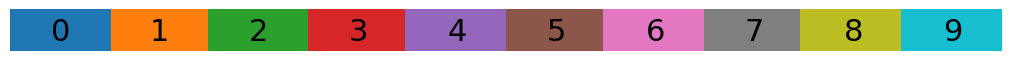

In [9]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
plt.figure(figsize=(10, 0.5))
img = plt.imshow(gradient, aspect='auto', cmap=cm.tab10)
for i in range(10):
    plt.text(10+i*25.6, 1, f"{i}", fontsize = 22)
plt.axis('off')
plt.savefig(f"../outputs/question1/q1_iii_colormap", bbox_inches='tight')